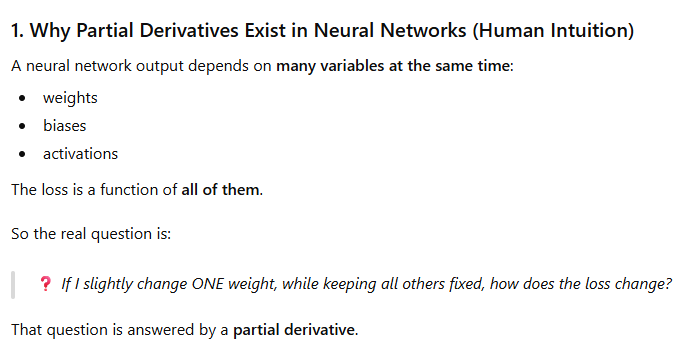

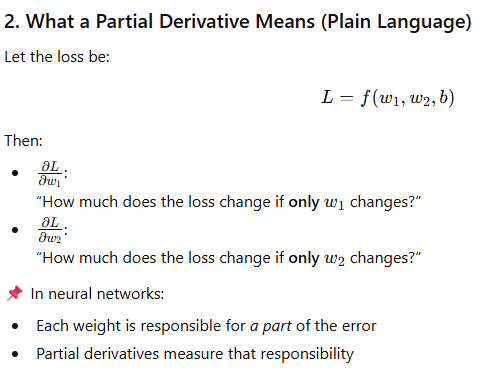

In [27]:
!pip install nnfs
!pip install matplotlib

In [28]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

In [29]:
# Initial inputs
inputs = np.array([1,2,3,4])

# Initial weights and biases
weights = np.array(
    [
        [0.1,0.2,0.3,0.4],
        [0.5,0.6,0.7, 0.8],
        [0.9, 1.0, 1.1, 1.2]
    ]
)

biases = np.array([0.1,0.2,0.3])

# Learning rate
learning_rate = 0.001

In [30]:
def RELU(x):
    return np.maximum(0, x)

def RELU_Derviative(x):
    return np.where(x > 0, 1,0)

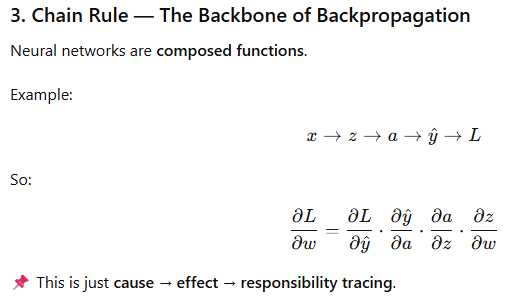

In [31]:
for i in range(200):
    # forward pass
    z = np.dot(weights, inputs) + biases
    a = RELU(z)
    y = np.sum(a)

    # Calculate loss
    loss = y**2

    # Backward pass
    # Gradient of loss with respect to output y
    dL_dy = 2 * y

    # Gradient of y with respect to a
    dy_da = np.ones_like(a)

    # Gradient of loss with respect to a
    dL_da = dL_dy * dy_da

    # Gradient of a with respect to z (RELU Derivative)
    da_dz = RELU_Derviative(z)

    # Gradient of loss with respect to z 
    dL_dz = dL_da * da_dz

    # Gradient of z with respect to weights and biases
    dL_dW = np.outer(dL_dz, inputs)
    dL_db = dL_dz

    # Update weights and biases
    weights -= learning_rate * dL_dW
    biases -= learning_rate * dL_db

    if i % 20 == 0:
        print(f"Interation {i}, Loss: {loss}")
    
print("Final weights: \n", weights)
print("Final biases: \n", biases)


Interation 0, Loss: 466.56000000000006
Interation 20, Loss: 5.329595763793193
Interation 40, Loss: 0.41191524253483786
Interation 60, Loss: 0.03183621475376345
Interation 80, Loss: 0.002460565405431671
Interation 100, Loss: 0.0001901729121621426
Interation 120, Loss: 1.4698120139337557e-05
Interation 140, Loss: 1.1359948840900371e-06
Interation 160, Loss: 8.779778427447647e-08
Interation 180, Loss: 6.785903626216421e-09
Final weights: 
 [[-0.00698895 -0.0139779  -0.02096685 -0.0279558 ]
 [ 0.25975286  0.11950571 -0.02074143 -0.16098857]
 [ 0.53548461  0.27096922  0.00645383 -0.25806156]]
Final biases: 
 [-0.00698895 -0.04024714 -0.06451539]
